In [311]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from scipy.spatial import distance

# **Problem Statement**

* Prepare a model for glass classification using KNN

# **Dataset - Glass**

In [312]:
df = pd.read_csv("/content/glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# **Dataset - Information**

> Data Description:

---

1. RI : refractive index
2. Na: Sodium (unit measurement: weight percent in corresponding oxide,  as are   attributes 4-10)
3. Mg: Magnesium
4. AI: Aluminum
5. Si: Silicon
6. K:Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron

> Type: Type of glass: (class attribute)

---
 * 1 -- building_windows_float_processed
 * 2 --building_windows_non_float_processed
 * 3 --vehicle_windows_float_processed
 * 4 --vehicle_windows_non_float_processed (none in this database)
 * 5 --containers
 * 6 --tableware
 * 7 --headlamps

# **EDA**

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [314]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [315]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [316]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [317]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 0 categorical variables

The categorical variables are :
 []


There are 10 Numeric variables

The Numeric variables are :
 ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']


In [318]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

RI 
 1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64
Na 
 13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64
Mg 
 0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64
Al 
 1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64
Si 
 72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64
K 
 0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64
Ca 
 8.03    5
8.43  

In [319]:
for col in df:
    print(f'{col}:\n {df[col].unique()}')

RI:
 [1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.51851 1.51662 1.51709 1.516

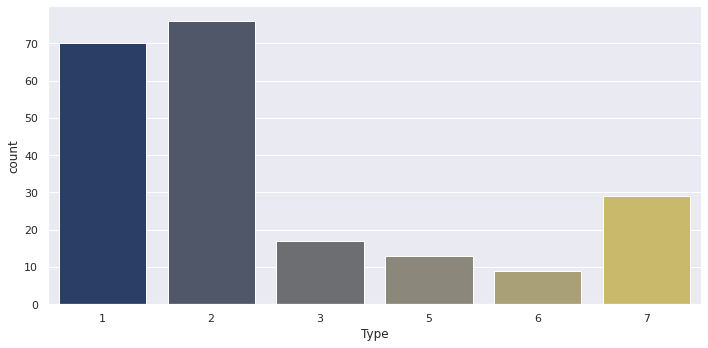

In [320]:
sns.catplot('Type', data=df, kind="count",height = 5,aspect = 2, palette="cividis")
plt.show()

<Figure size 432x288 with 0 Axes>

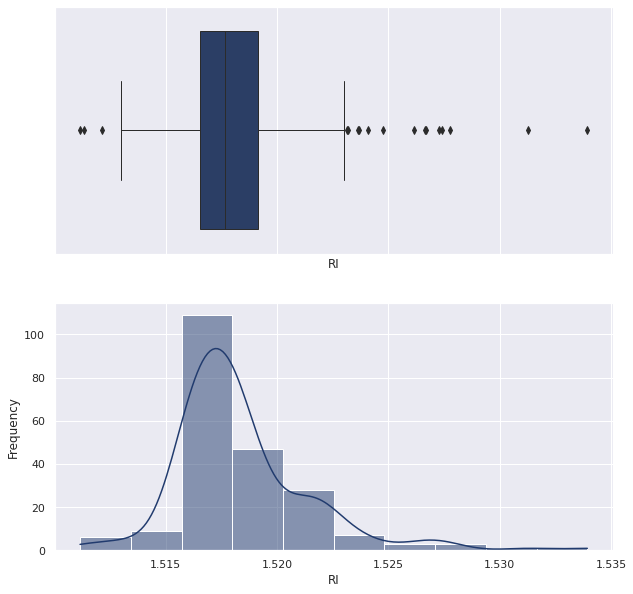

<Figure size 720x720 with 0 Axes>

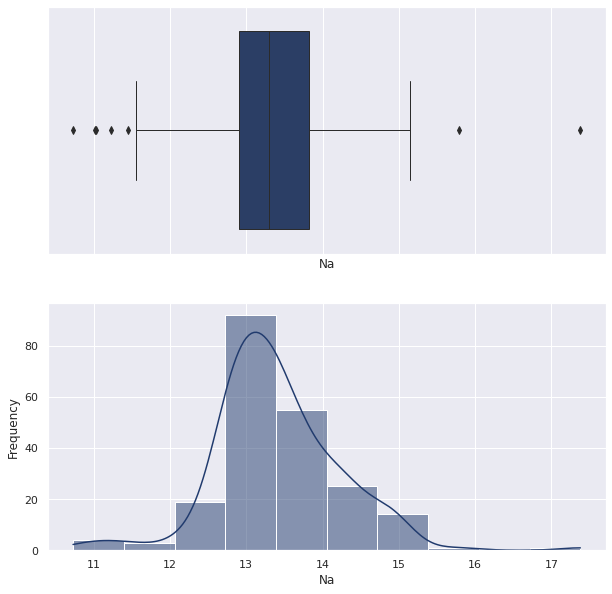

<Figure size 720x720 with 0 Axes>

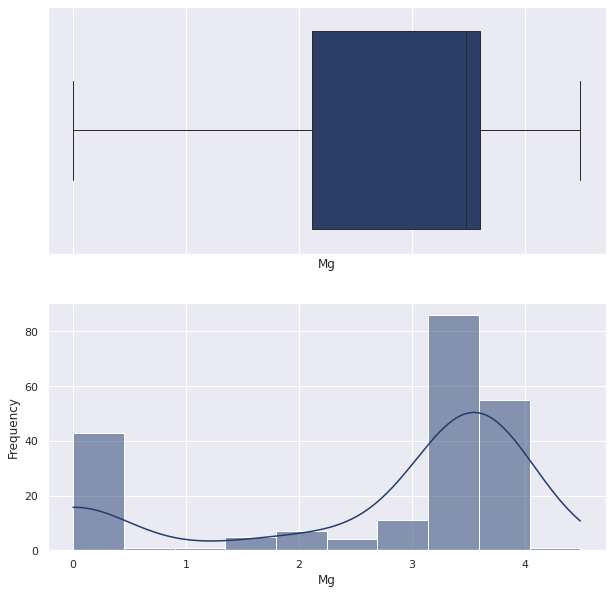

<Figure size 720x720 with 0 Axes>

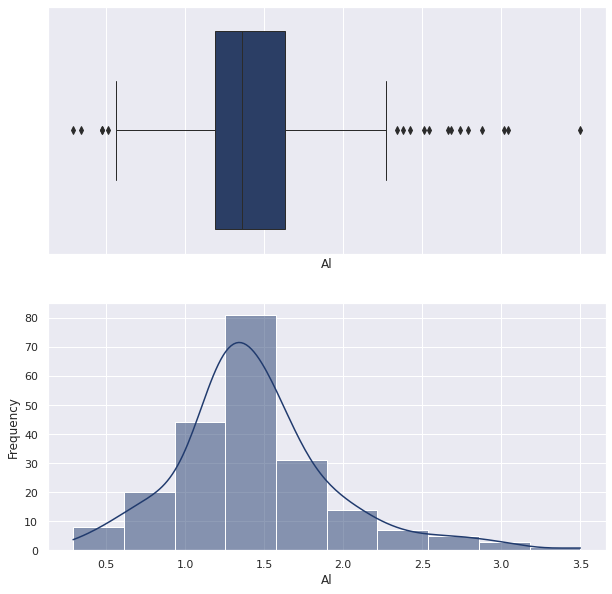

<Figure size 720x720 with 0 Axes>

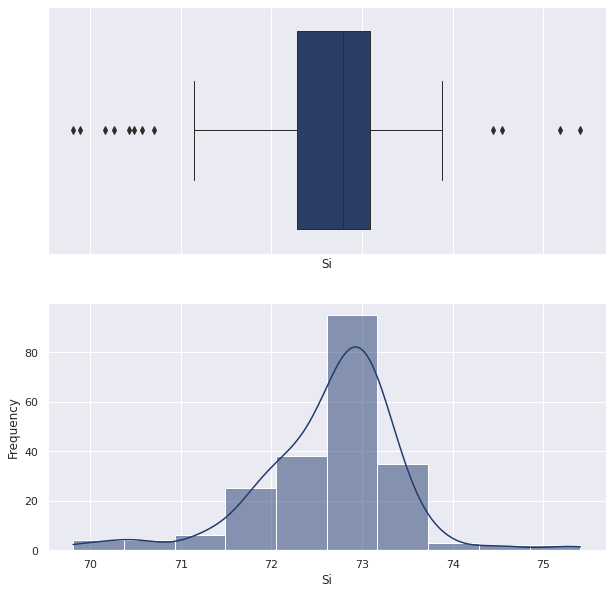

<Figure size 720x720 with 0 Axes>

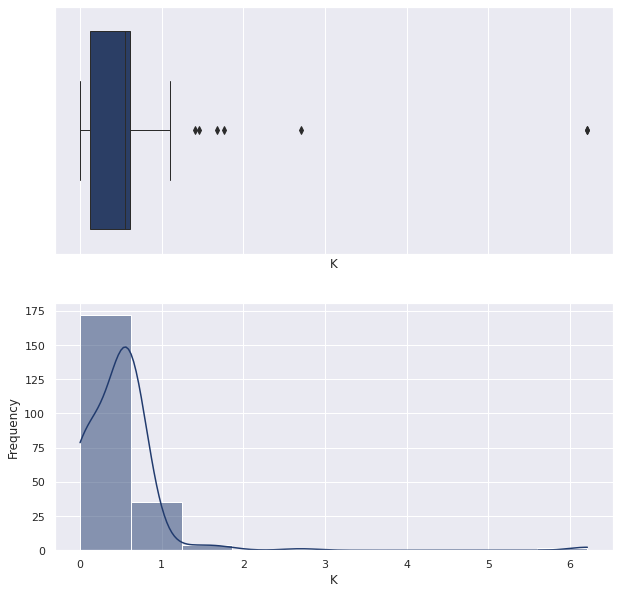

<Figure size 720x720 with 0 Axes>

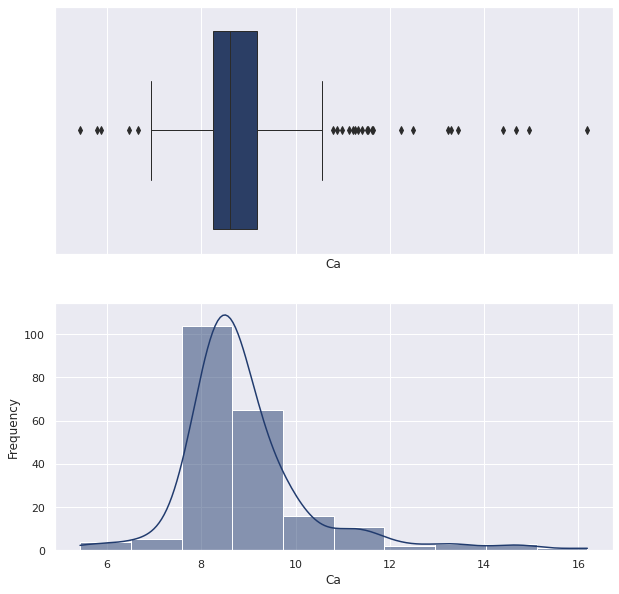

<Figure size 720x720 with 0 Axes>

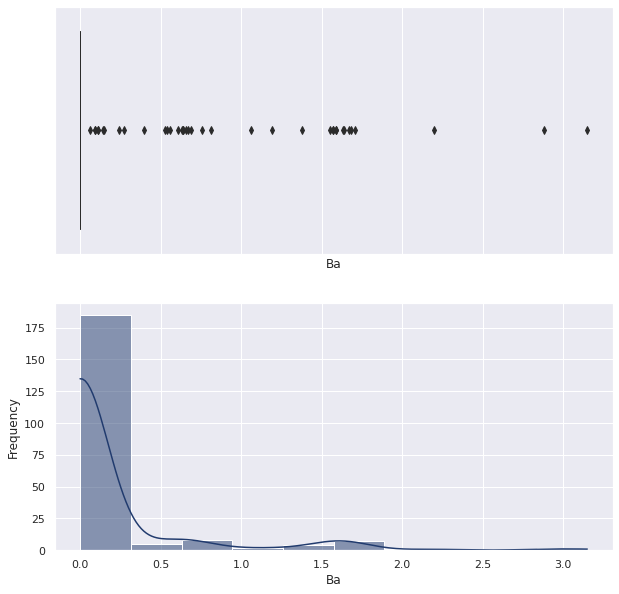

<Figure size 720x720 with 0 Axes>

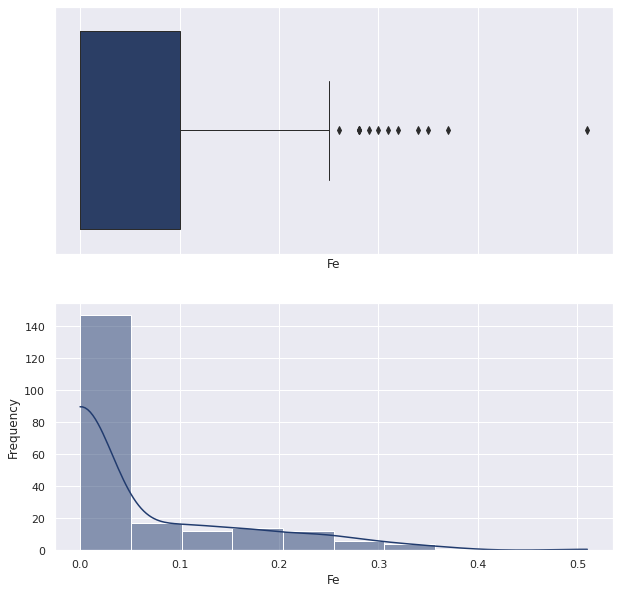

<Figure size 720x720 with 0 Axes>

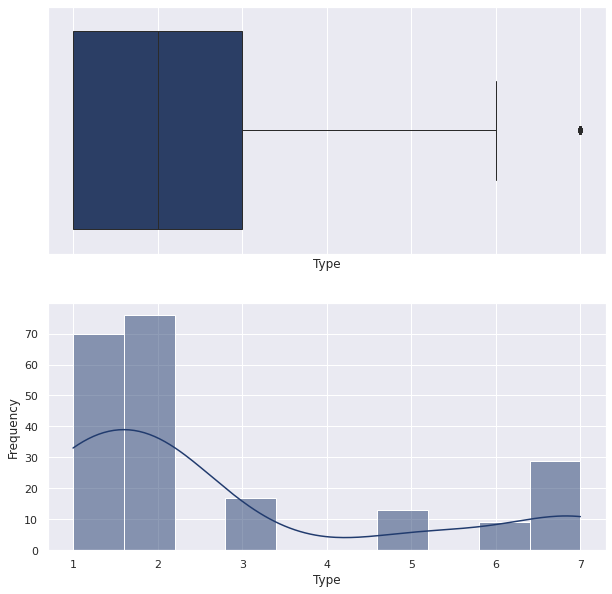

In [321]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="cividis")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)
    plt.show()

            RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.492262  0.083060 -0.74

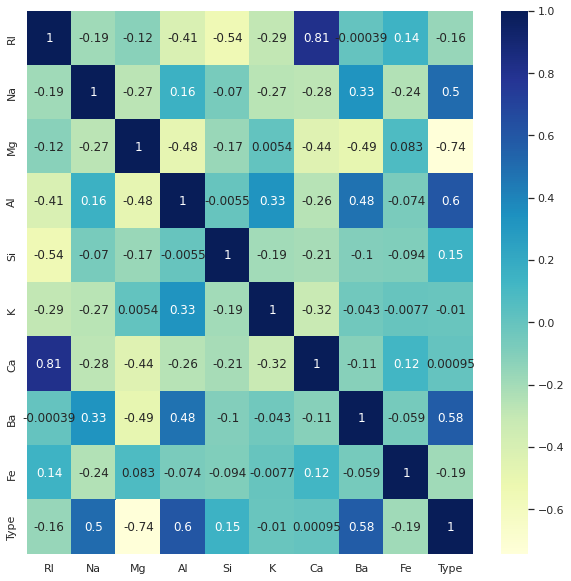

In [322]:
print(df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

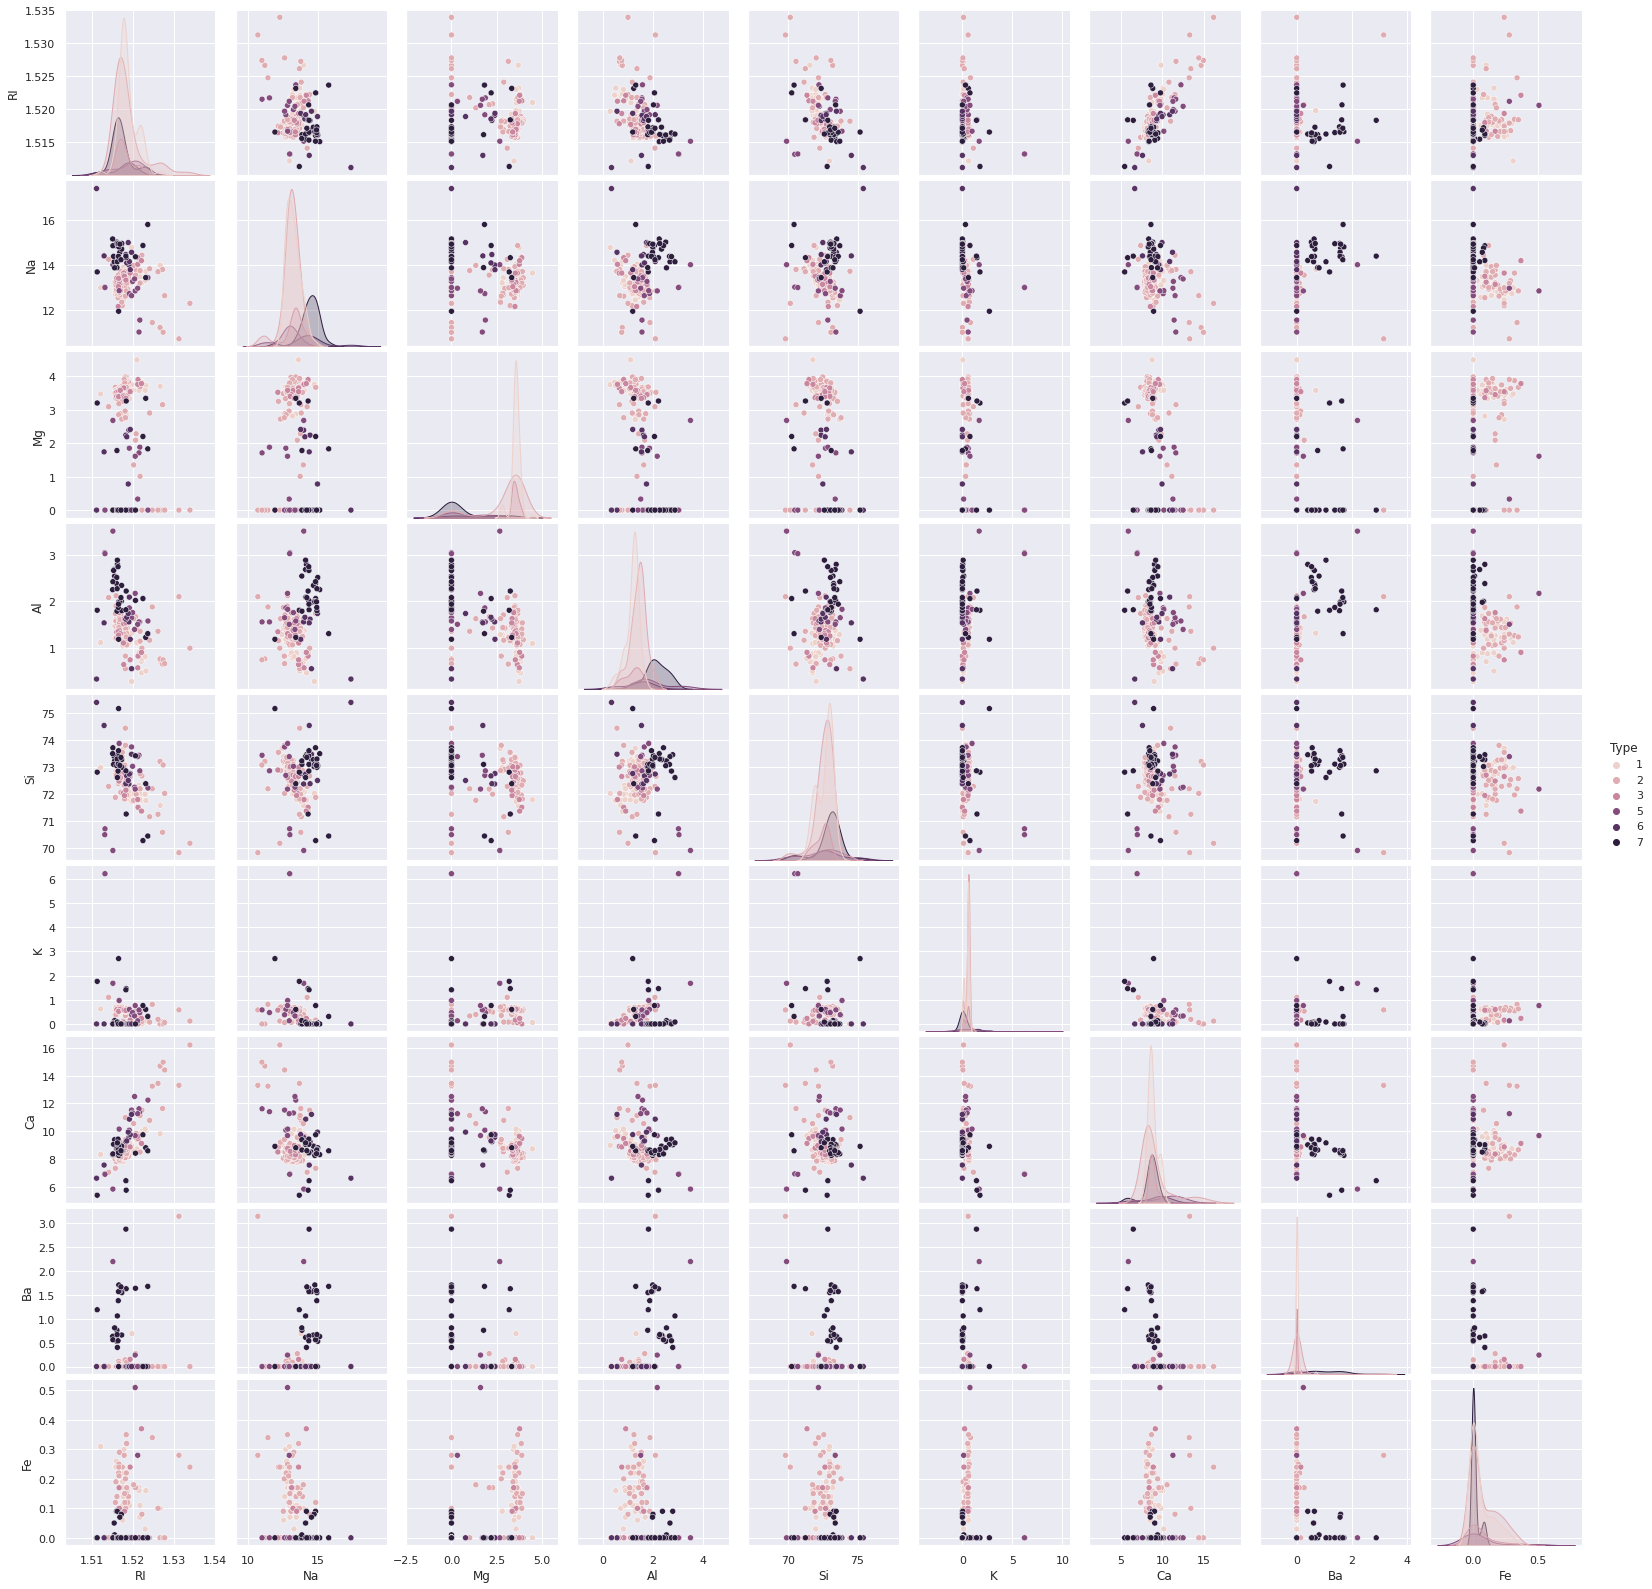

In [323]:
#pairwise plot of all the features
sns.pairplot(df,hue='Type')
plt.show()

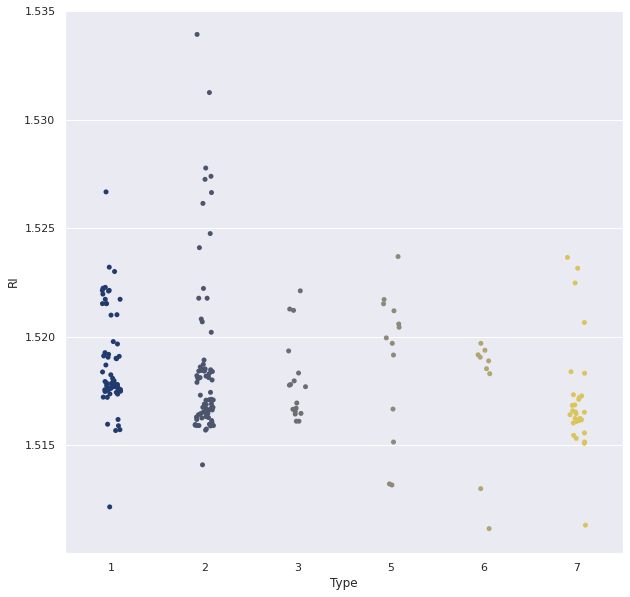

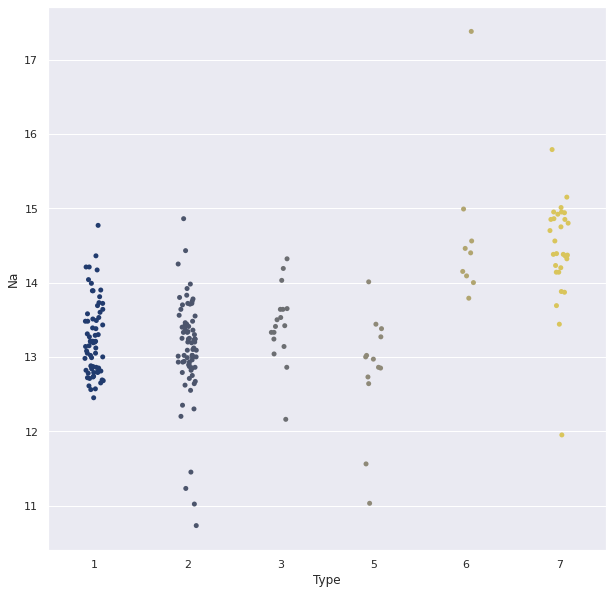

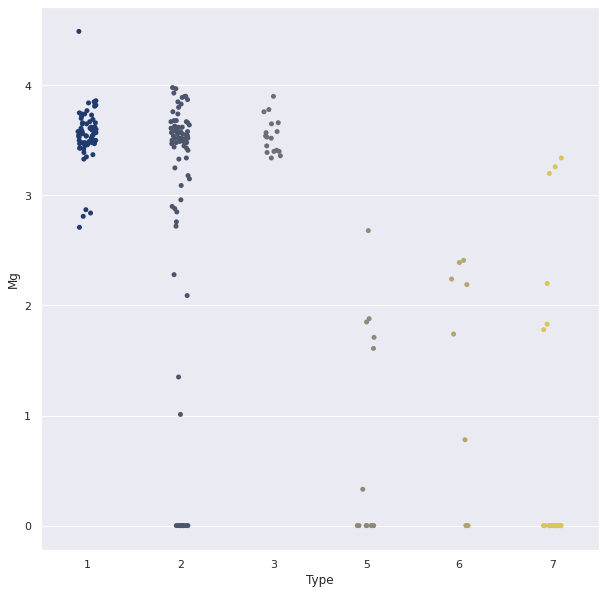

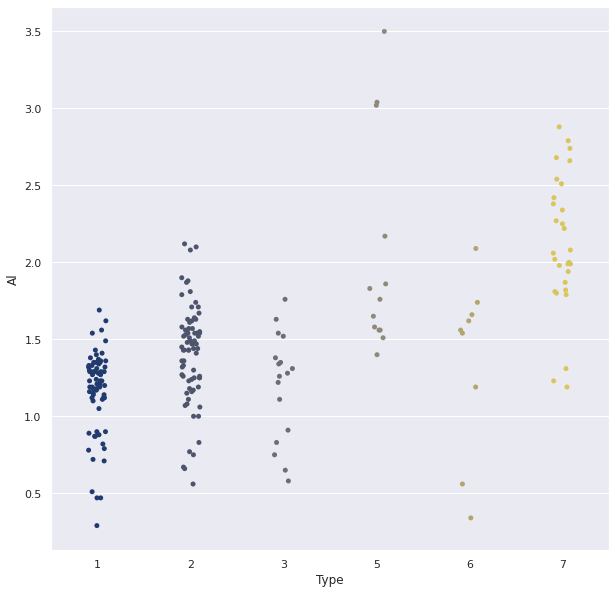

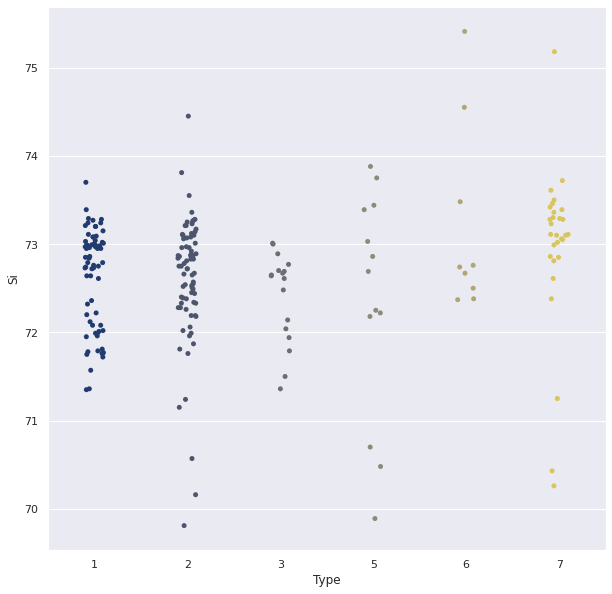

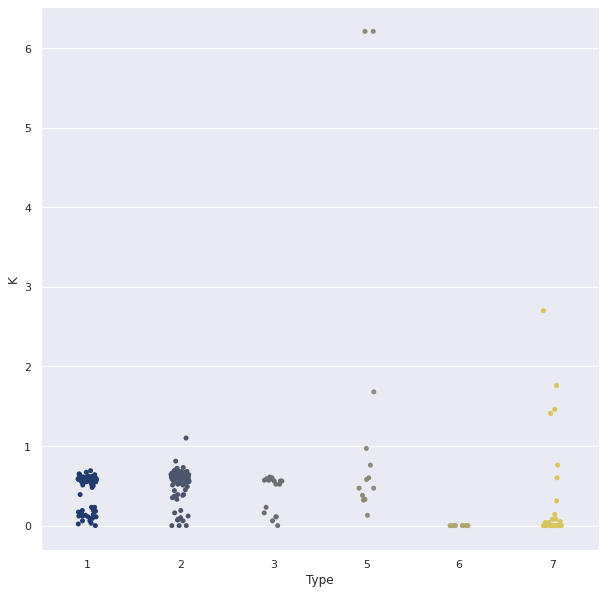

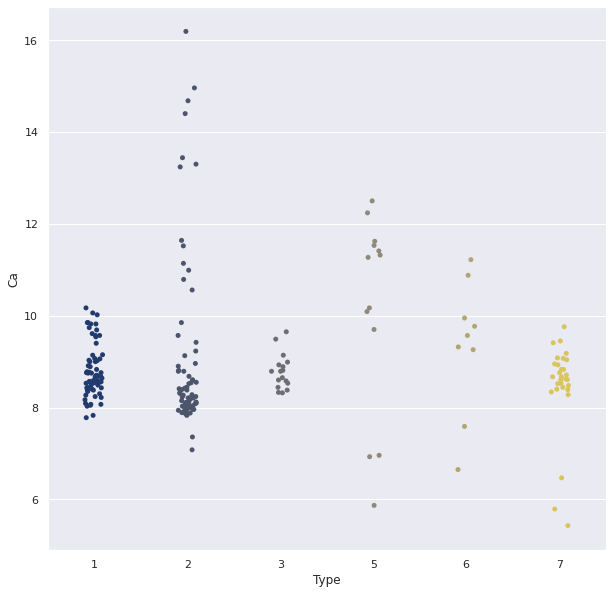

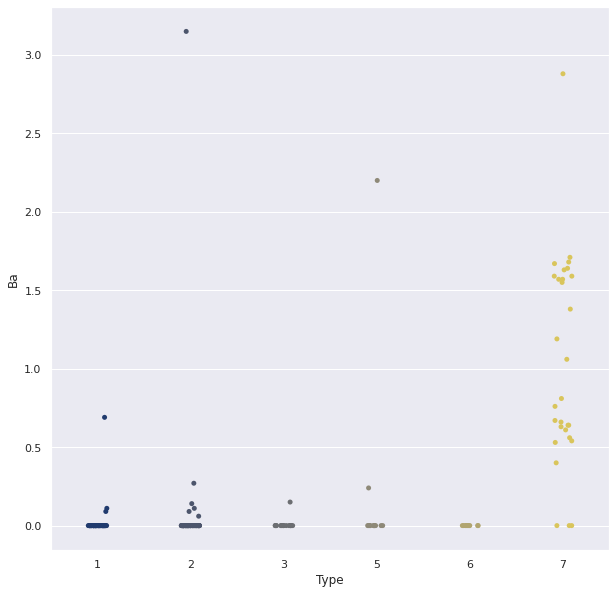

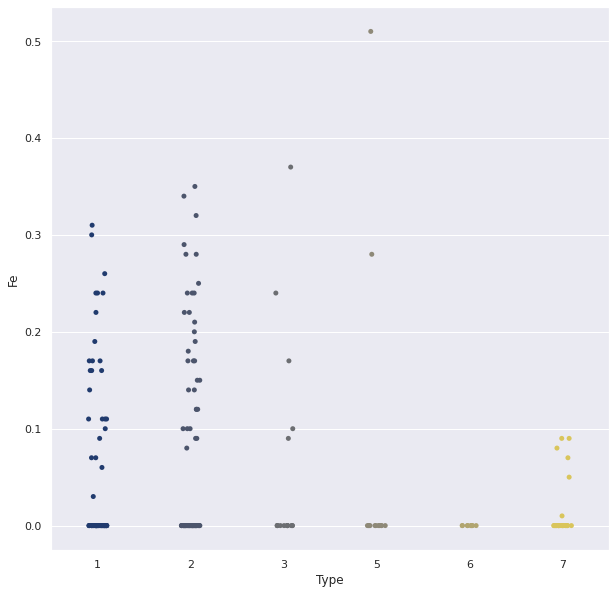

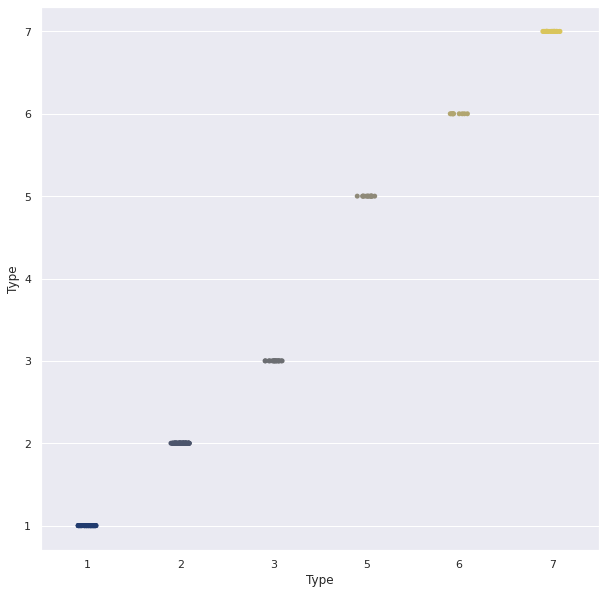

In [324]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.stripplot(x='Type',y=i,data=df)

## **KNN**
> The KNN algorithm is a supervised machine learning model . It predicts a target variable using one or multiple independent variables.

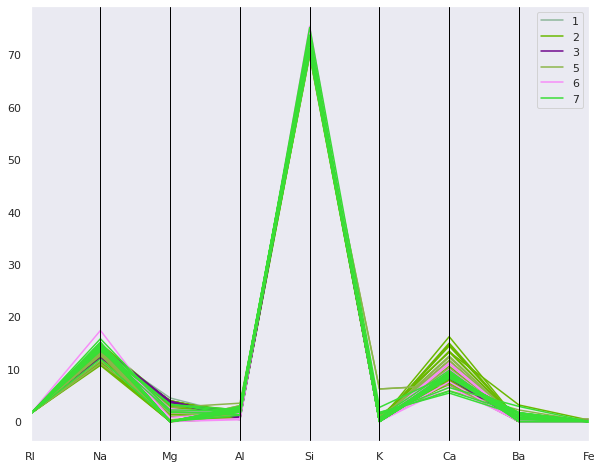

In [325]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,8))
parallel_coordinates(df, "Type")

## **Feature Scaling**

In [326]:
from sklearn.preprocessing import StandardScaler

In [327]:
array = df.values

In [328]:
# Normalization function
#stscaler = StandardScaler().fit(array)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(array)

In [329]:
scaled_data

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ...,  2.95320036,
        -0.5864509 ,  2.01047778],
       [-0.61239854,  1.19327046, -1.86551055, ...,  2.81208731,
        -0.5864509 ,  2.01047778],
       [-0.41436305,  1.00915211, -1.86551055, ...,  3.01367739,
        -0.5864509 ,  2.01047778]])

In [330]:
scaled_data = pd.DataFrame(scaled_data, columns = df.columns)
scaled_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,2.010478
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,2.010478
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,2.010478
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,2.010478


## **Independent and Dependent Variables**

In [331]:
x  = scaled_data.iloc[: , 0:9]
y = df.iloc[ :,9]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

Visualiztion using TSNE



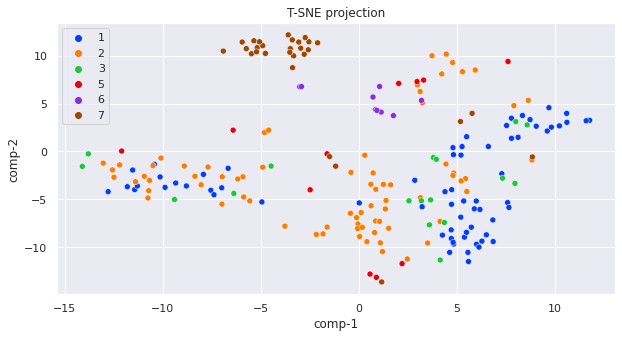

In [332]:
import sklearn
from sklearn.manifold import TSNE

print("Visualiztion using TSNE\n")
tsne = TSNE(n_components=2,random_state=123)
z = tsne.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
    
plt.figure(figsize=(10,5))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
              palette=sns.color_palette("bright", 6),
                data=df).set(title="T-SNE projection") 
plt.show()

In [333]:
x.shape,y.shape

((214, 9), (214,))

## **Train & Test - Splitting**

In [334]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.30, random_state=0)

In [335]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 9)
(65, 9)
(149,)
(65,)


# **Different Method of Distances in K-Nearest Neighbors**
---
**1. Euclidean**

**2. manhattan**

## **Using Euclidean Distance:**

In [336]:
from sklearn.model_selection import KFold
from scipy.spatial import distance

In [337]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [338]:
k_range = list(range(1, 41))
parameters = {
    'n_neighbors': k_range,
     'weights': ['uniform', 'distance'] ,
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [339]:
model = KNeighborsClassifier(metric=distance.sqeuclidean)
grid = GridSearchCV(estimator=model, param_grid=parameters,n_jobs=-1,verbose=1, scoring="accuracy")
grid.fit(x_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(estimator=KNeighborsClassifier(metric=<function sqeuclidean at 0x7f3f4d363f70>),
             n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

* **Here , GribsearchCV suggest us a best parameter with best score, so now we build our model using this suggestions.**

In [340]:
print(grid.best_score_ ,'\n',"\n" , grid.best_params_)

0.6924137931034482 
 
 {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [341]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(grid.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.7692


> By fitting the model with GridsearchCv we came up with the overfitting issue, to overcome this issue now we plot the training and testing graph to find out best k-Neighbor value.

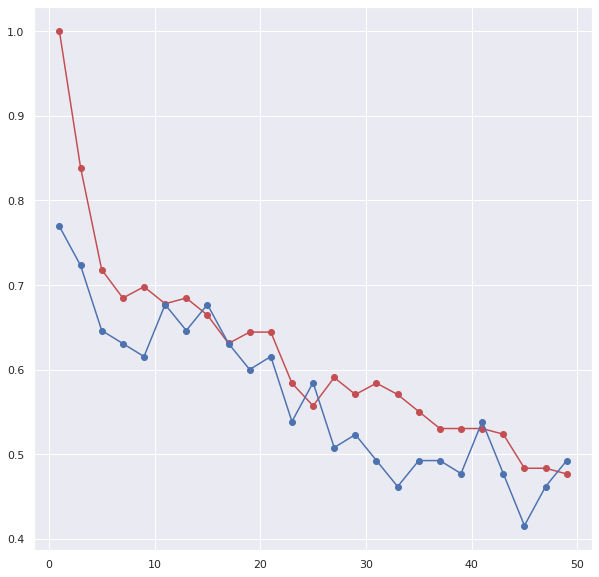

In [342]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(1,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i, metric=distance.sqeuclidean)
    neigh.fit(x_train, y_train)
    train_acc = np.mean(neigh.predict(x_train) == y_train)
    test_acc = np.mean(neigh.predict(x_test) == y_test)
    acc.append([train_acc, test_acc])


# train accuracy plot 
plt.plot(np.arange(1,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,50,2),[i[1] for i in acc],"bo-")
plt.show()

> Here,If we set K-neighbour value = 11 ,so there is neither problem of over-fitting nor under-fitting on the basis of above visualisation.

## **Model Building:**

In [343]:
#Square Euclidean

euclid_model = KNeighborsClassifier(n_neighbors=11, metric=distance.sqeuclidean) # Square Euclidean distance model
euclid_model.fit(x_train,y_train) # Train models

KNeighborsClassifier(metric=<function sqeuclidean at 0x7f3f4d363f70>,
                     n_neighbors=11)

In [344]:
print(f'euclidean distance \n\n')
for i in range(2,40):
  euclid_model = euclid_model
  cv = KFold(n_splits=i, shuffle=True, random_state=0)
  scores = cross_val_score(euclid_model, x, y, cv=cv)
  print(f'K-Fold number {i} : Accuracy {scores.mean()}')

euclidean distance 


K-Fold number 2 : Accuracy 0.5794392523364486
K-Fold number 3 : Accuracy 0.6261737089201879
K-Fold number 4 : Accuracy 0.6171383647798742
K-Fold number 5 : Accuracy 0.6122923588039867
K-Fold number 6 : Accuracy 0.6308201058201058
K-Fold number 7 : Accuracy 0.6125960061443932
K-Fold number 8 : Accuracy 0.6356837606837606
K-Fold number 9 : Accuracy 0.6213768115942028
K-Fold number 10 : Accuracy 0.6227272727272728
K-Fold number 11 : Accuracy 0.6416267942583732
K-Fold number 12 : Accuracy 0.6318082788671023
K-Fold number 13 : Accuracy 0.6507352941176472
K-Fold number 14 : Accuracy 0.6348214285714285
K-Fold number 15 : Accuracy 0.648888888888889
K-Fold number 16 : Accuracy 0.6414835164835164
K-Fold number 17 : Accuracy 0.6447963800904978
K-Fold number 18 : Accuracy 0.6557239057239058
K-Fold number 19 : Accuracy 0.6343700159489633
K-Fold number 20 : Accuracy 0.6531818181818183
K-Fold number 21 : Accuracy 0.6251082251082252
K-Fold number 22 : Accuracy 0.6454545454545455


In [345]:
cv = KFold(n_splits=18, shuffle=True, random_state=0)
results = cross_val_score(euclid_model, x_train, y_train, cv=cv)
print(results.mean())

0.6095679012345678


* **Here the splits for best K-Fold number with best accuracy score is 18.**

* **Cross validation score =  60%**





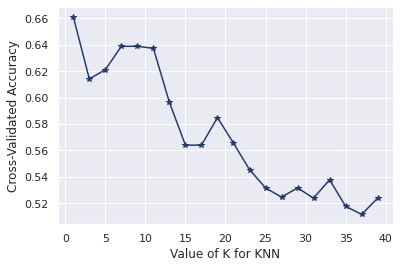

In [346]:
# Visualising k neighbors value:

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41,2)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance.sqeuclidean)
    cv = KFold(n_splits=18, shuffle=True, random_state=10)
    scores = cross_val_score(knn, x_train, y_train, cv=cv)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores, marker = '*')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [347]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(euclid_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(euclid_model.score(x_test, y_test)))

Training set score: 0.6779
Test set score: 0.6769


In [348]:
# Make predictions
euclid_predictions = euclid_model.predict(x_test) 

In [349]:
y_pred_prob = euclid_model.predict_proba(x_test)
y_pred_prob[10]

array([0.54545455, 0.45454545, 0.        , 0.        , 0.        ,
       0.        ])

In [350]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['1', '2','3','5','6','7'])

y_pred_prob_df

,1,2,3,5,6,7
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.909091,0.090909,0.000000,0.000000,0.000000,0.0
2,0.363636,0.636364,0.000000,0.000000,0.000000,0.0
3,0.454545,0.090909,0.090909,0.000000,0.363636,0.0
4,0.000000,0.272727,0.000000,0.454545,0.272727,0.0
...,...,...,...,...,...,...
60,0.909091,0.000000,0.090909,0.000000,0.000000,0.0
61,0.454545,0.545455,0.000000,0.000000,0.000000,0.0
62,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
63,0.272727,0.363636,0.090909,0.000000,0.272727,0.0


In [351]:
df1 = pd.DataFrame({'actual': y_test, 'euclid': euclid_predictions})
df1.head()

,actual,euclid
197,7,7
37,1,1
89,2,2
176,6,1
170,5,5


In [352]:
cm=pd.crosstab(y_test, euclid_predictions, rownames = ['Actual'], colnames= ['Predictions']) 
cm

Predictions,1,2,5,6,7
Actual,,,,,
1,19,2,0,0,0
2,8,17,0,1,0
3,5,2,0,0,0
5,0,1,1,0,0
6,1,1,0,0,0
7,0,0,0,0,7


In [353]:
print("Accuracy", accuracy_score(y_test,euclid_predictions)*100)

Accuracy 67.6923076923077


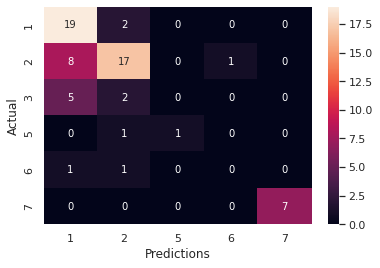

In [354]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [355]:
from sklearn.metrics import classification_report,mean_squared_error

print(classification_report(y_test, euclid_predictions))

              precision    recall  f1-score   support

           1       0.58      0.90      0.70        21
           2       0.74      0.65      0.69        26
           3       0.00      0.00      0.00         7
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.68        65
   macro avg       0.55      0.51      0.51        65
weighted avg       0.62      0.68      0.63        65



In [356]:
# rmse and mse for train data
train_preds_grid = grid.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# rmse and mse for test data
test_preds_grid = grid.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)

print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.0 

 test rmse = 0.6445033866354896 




In [357]:
target= ["1","2","3","5","6","7"]



# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)





 ROC AUC score: 0.7142255892255892 




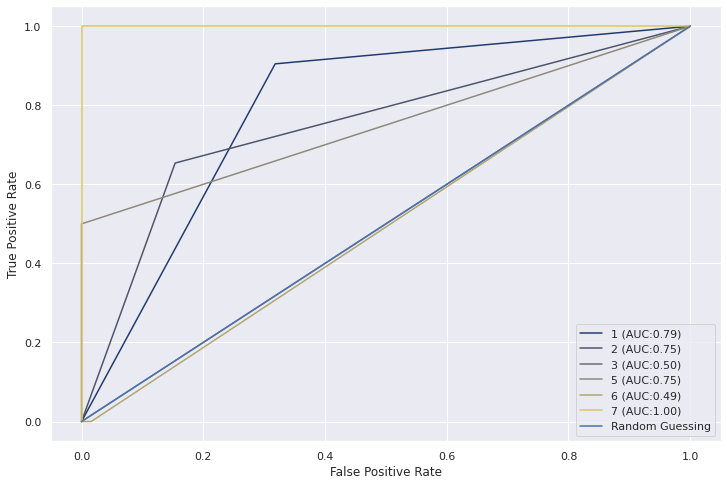

In [358]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print(f'\n\n ROC AUC score: {multiclass_roc_auc_score(y_test, euclid_predictions)} \n\n')

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

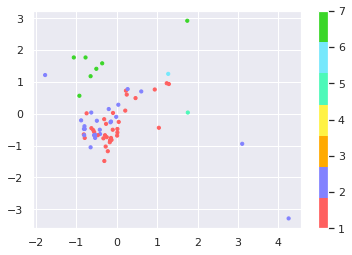

In [359]:
from matplotlib.colors import ListedColormap

# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=euclid_predictions, s=10, cmap=cm_dark)
f.colorbar(points)
plt.show()

## **Using Manhattan Distance :**

In [360]:
model = KNeighborsClassifier(metric=distance.cityblock)
grid = GridSearchCV(estimator=model, param_grid=parameters,n_jobs=-1,verbose=1, scoring="accuracy")
grid.fit(x_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(estimator=KNeighborsClassifier(metric=<function cityblock at 0x7f3f4d0353a0>),
             n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [361]:
print(grid.best_score_ ,'\n',"\n" , grid.best_params_)

0.7121839080459769 
 
 {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}


In [362]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(grid.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.7385


* **Here , GribsearchCV suggest us a best parameter with best score, so now we build our model using this suggestions.**


> By fitting the model with GridsearchCv we came up with the overfitting issue, to overcome this issue now we plot the training and testing graph to give us best k-Neighbor value.

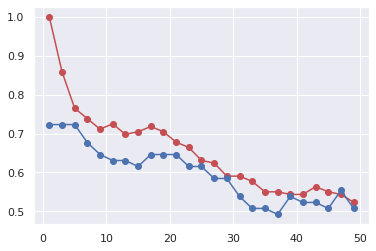

In [363]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(1,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i, metric=distance.cityblock)
    neigh.fit(x_train, y_train)
    train_acc = np.mean(neigh.predict(x_train) == y_train)
    test_acc = np.mean(neigh.predict(x_test) == y_test)
    acc.append([train_acc, test_acc])


# train accuracy plot 
plt.plot(np.arange(1,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,50,2),[i[1] for i in acc],"bo-")

> Here,If we set K-neighbour value = 5 ,so there is neither problem of over-fitting nor under-fitting on the basis of above visualisation.

### **Model Building:**

In [364]:
manhattan_model = KNeighborsClassifier(n_neighbors=5, metric=distance.cityblock,) # Manhattan distance model
manhattan_model.fit(x_train, y_train)

KNeighborsClassifier(metric=<function cityblock at 0x7f3f4d0353a0>)

In [365]:
print(f'\n\n manhattan distance \n\n')
for i in range(2,40):
  manhattan_model = manhattan_model
  cv = KFold(n_splits=i, shuffle=True, random_state=0)
  scores = cross_val_score(manhattan_model, x, y, cv=cv)
  print(f'K-Fold number {i} : Accuracy {scores.mean()}')



 manhattan distance 


K-Fold number 2 : Accuracy 0.616822429906542
K-Fold number 3 : Accuracy 0.6774908711528429
K-Fold number 4 : Accuracy 0.6543501048218029
K-Fold number 5 : Accuracy 0.6778516057585826
K-Fold number 6 : Accuracy 0.6727513227513228
K-Fold number 7 : Accuracy 0.6874039938556068
K-Fold number 8 : Accuracy 0.6778846153846154
K-Fold number 9 : Accuracy 0.6777375201288245
K-Fold number 10 : Accuracy 0.6593073593073593
K-Fold number 11 : Accuracy 0.6739234449760766
K-Fold number 12 : Accuracy 0.6691176470588235
K-Fold number 13 : Accuracy 0.6787330316742082
K-Fold number 14 : Accuracy 0.6717261904761905
K-Fold number 15 : Accuracy 0.666984126984127
K-Fold number 16 : Accuracy 0.6778846153846154
K-Fold number 17 : Accuracy 0.677978883861237
K-Fold number 18 : Accuracy 0.6742424242424243
K-Fold number 19 : Accuracy 0.6718500797448166
K-Fold number 20 : Accuracy 0.6740909090909091
K-Fold number 21 : Accuracy 0.6727272727272728
K-Fold number 22 : Accuracy 0.6838383838383838

In [366]:
cv = KFold(n_splits=7, shuffle=True, random_state=0)
results = cross_val_score(manhattan_model, x_train, y_train, cv=cv)
print(results.mean())

0.6515151515151515


* **Here the splits for best K-Fold number with best accuracy score is 7.**

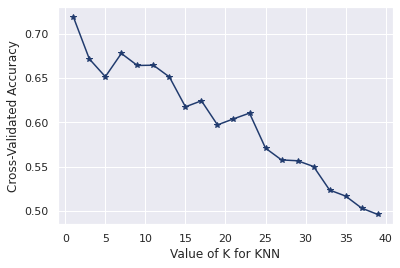

In [367]:
# Visualising k neighbors value:

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41,2)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance.cityblock)
    cv = KFold(n_splits=7, shuffle=True, random_state=0)
    scores = cross_val_score(knn, x_train, y_train, cv=cv)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores, marker = '*')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [368]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(manhattan_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(manhattan_model.score(x_test, y_test)))

Training set score: 0.7651
Test set score: 0.7231


In [369]:
# Make predictions
manhattan_predictions = manhattan_model.predict(x_test)

In [370]:
y_pred_prob = manhattan_model.predict_proba(x_test)
y_pred_prob[10]

array([0.6, 0.4, 0. , 0. , 0. , 0. ])

In [371]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['1', '2','3','5','6','7'])

y_pred_prob_df

,1,2,3,5,6,7
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.8,0.0,0.0,0.0,0.0
3,0.2,0.0,0.0,0.0,0.8,0.0
4,0.0,0.4,0.0,0.6,0.0,0.0
...,...,...,...,...,...,...
60,0.8,0.0,0.2,0.0,0.0,0.0
61,0.4,0.6,0.0,0.0,0.0,0.0
62,1.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.8,0.2,0.0,0.0,0.0


In [372]:
df1 = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions,})
df1.head()

,actual,manhattan
197,7,7
37,1,1
89,2,2
176,6,6
170,5,5


In [373]:
print("Accuracy", accuracy_score(y_test,manhattan_predictions)*100)

Accuracy 72.3076923076923


In [374]:
cm=pd.crosstab(y_test, manhattan_predictions, rownames = ['Actual'], colnames= ['Predictions']) 
cm

Predictions,1,2,5,6,7
Actual,,,,,
1,17,4,0,0,0
2,6,19,1,0,0
3,6,1,0,0,0
5,0,0,2,0,0
6,0,0,0,2,0
7,0,0,0,0,7


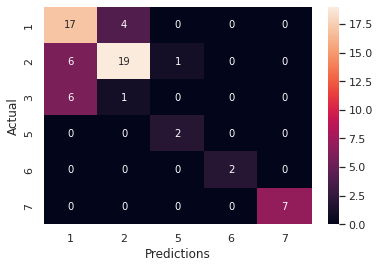

In [375]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [376]:
print(classification_report(y_test, manhattan_predictions))

              precision    recall  f1-score   support

           1       0.59      0.81      0.68        21
           2       0.79      0.73      0.76        26
           3       0.00      0.00      0.00         7
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.72        65
   macro avg       0.67      0.76      0.71        65
weighted avg       0.67      0.72      0.69        65



In [377]:
# rmse and mse for train data
train_preds_grid = grid.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# rmse and mse for test data
test_preds_grid = grid.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)

print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.0 

 test rmse = 0.8227533512074423 




In [378]:
y_pred_prob = manhattan_model.predict_proba(x_test)
y_pred_prob[10]

array([0.6, 0.4, 0. , 0. , 0. , 0. ])

In [379]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['1', '2','3','5','6','7'])

y_pred_prob_df

,1,2,3,5,6,7
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.8,0.0,0.0,0.0,0.0
3,0.2,0.0,0.0,0.0,0.8,0.0
4,0.0,0.4,0.0,0.6,0.0,0.0
...,...,...,...,...,...,...
60,0.8,0.0,0.2,0.0,0.0,0.0
61,0.4,0.6,0.0,0.0,0.0,0.0
62,1.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.8,0.2,0.0,0.0,0.0




 ROC AUC score: 0.8436239686239686 




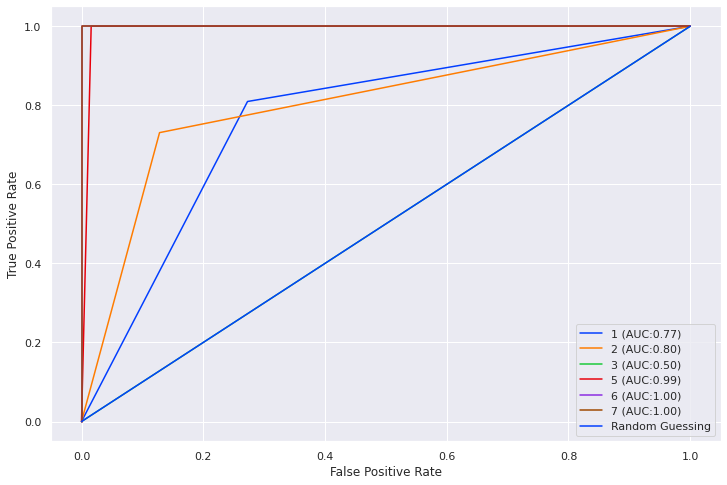

In [380]:
# ROC CURVE for Euclidean

target= ["1","2","3","5","6","7"]
sns.set( palette="bright")
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

print(f'\n\n ROC AUC score: {multiclass_roc_auc_score(y_test, manhattan_predictions)} \n\n')

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

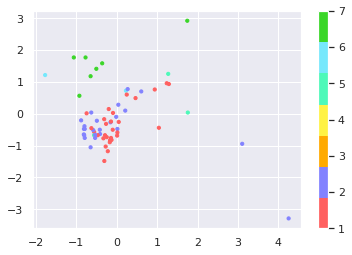

In [381]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=manhattan_predictions, s=10, cmap=cm_dark)
f.colorbar(points)
plt.show()

# **Using Over Sampling for balancing the data**.

* We will use RandomOverSampler (ROS) for sampling the the data to balance our data

In [382]:
from imblearn.over_sampling import RandomOverSampler

In [383]:
ros = RandomOverSampler(random_state = 0)

* Fitting the data using ROS

In [384]:
x_resample, y_resample = ros.fit_resample(x,y)
y_df = pd.DataFrame(y_resample)

In [385]:
y_df.value_counts()

Type
1       76
2       76
3       76
5       76
6       76
7       76
dtype: int64

* **We could see the data is resampled now and all the type values are 76 now. Previously only type 1 was 76. We will split the resampled data into training and test data and build a KNN mode**

In [386]:
X_train, X_test, Y_train, Y_test = train_test_split(x_resample, y_resample, test_size = .2, random_state = 0, stratify = y_resample)

### **Using GridSearch for Algorithm Tuning after resampling**

In [387]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=parameters,n_jobs=-1,verbose=1, scoring="accuracy")
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [388]:
print(grid.best_score_ ,'\n',"\n" , grid.best_params_)

0.8872907153729072 
 
 {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


* After applying GridSearch, we got the best K (n_neighbors) value as 1, so we will be using the k= 1 for KNN Classifier algorithm

In [389]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(grid.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 0.9022


* **Here , GribsearchCV suggest us a best parameter with best score, so now we build our model using this suggestions.**


> By fitting the model with GridsearchCv we came up with the overfitting issue, to overcome this issue now we plot the training and testing graph to give us best k-Neighbor value.

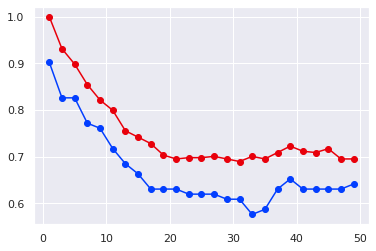

In [390]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(1,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])


# train accuracy plot 
plt.plot(np.arange(1,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,50,2),[i[1] for i in acc],"bo-")

> Here,If we set K-neighbour value = 5 ,so there is neither problem of over-fitting nor under-fitting on the basis of above visualisation.

> **Using KNN with k=5 for model classification**
---

* We had identified the k=5 is best parameter with GridSearch so using k as 5

## **Model Building:**

In [391]:
model = KNeighborsClassifier(n_neighbors=5) # Manhattan distance model
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [392]:
print(f'\n\n manhattan distance \n\n')
for i in range(2,40):
  model = model
  cv = KFold(n_splits=i, shuffle=True, random_state=0)
  scores = cross_val_score(model, x_resample, y_resample, cv=cv)
  print(f'K-Fold number {i} : Accuracy {scores.mean()}')



 manhattan distance 


K-Fold number 2 : Accuracy 0.7302631578947368
K-Fold number 3 : Accuracy 0.793859649122807
K-Fold number 4 : Accuracy 0.8157894736842105
K-Fold number 5 : Accuracy 0.8223363592928811
K-Fold number 6 : Accuracy 0.8245614035087719
K-Fold number 7 : Accuracy 0.8487845487845487
K-Fold number 8 : Accuracy 0.8464912280701755
K-Fold number 9 : Accuracy 0.8575599128540304
K-Fold number 10 : Accuracy 0.8531884057971014
K-Fold number 11 : Accuracy 0.8553479041283919
K-Fold number 12 : Accuracy 0.8574561403508772
K-Fold number 13 : Accuracy 0.8511599511599511
K-Fold number 14 : Accuracy 0.853219696969697
K-Fold number 15 : Accuracy 0.853046594982079
K-Fold number 16 : Accuracy 0.8621459359605912
K-Fold number 17 : Accuracy 0.8576336517512989
K-Fold number 18 : Accuracy 0.8574358974358975
K-Fold number 19 : Accuracy 0.8552631578947368
K-Fold number 20 : Accuracy 0.8553359683794467
K-Fold number 21 : Accuracy 0.8509585652442796
K-Fold number 22 : Accuracy 0.853030303030303


In [393]:
cv = KFold(n_splits=16, shuffle=True, random_state=0)
results = cross_val_score(model, X_train, Y_train, cv=cv)
print(results.mean())

0.8320158102766799


* **Here the splits for best K-Fold number with best accuracy score is 16.**

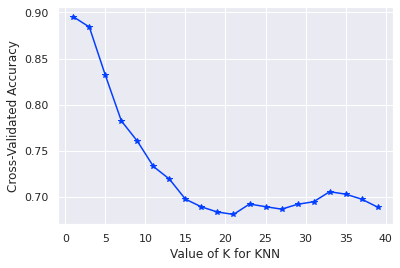

In [394]:
# Visualising k neighbors value:

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41,2)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = KFold(n_splits=16, shuffle=True, random_state=0)
    scores = cross_val_score(knn, X_train, Y_train, cv=cv)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores, marker = '*')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [395]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, Y_test)))

Training set score: 0.8984
Test set score: 0.8261


In [396]:
# Make predictions
model_pred = model.predict(X_test)

In [397]:
df1 = pd.DataFrame({'actual': Y_test, 'model': model_pred})
df1.head()

,actual,model
302,5,5
355,6,6
16,1,1
83,2,1
106,2,2


In [398]:
print("Accuracy", accuracy_score(Y_test,model_pred)*100)

Accuracy 82.6086956521739


In [399]:
cm=pd.crosstab(Y_test, model_pred, rownames = ['Actual'], colnames= ['Predictions']) 
cm

Predictions,1,2,3,5,6,7
Actual,,,,,,
1,8,5,3,0,0,0
2,3,8,2,2,0,0
3,0,0,15,0,0,0
5,0,0,0,15,0,0
6,0,0,0,0,16,0
7,0,0,0,0,1,14


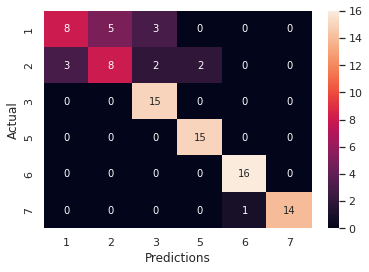

In [400]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [401]:
print(classification_report(Y_test, model_pred))

              precision    recall  f1-score   support

           1       0.73      0.50      0.59        16
           2       0.62      0.53      0.57        15
           3       0.75      1.00      0.86        15
           5       0.88      1.00      0.94        15
           6       0.94      1.00      0.97        16
           7       1.00      0.93      0.97        15

    accuracy                           0.83        92
   macro avg       0.82      0.83      0.82        92
weighted avg       0.82      0.83      0.81        92



In [402]:
# rmse and mse for train data
train_preds_grid = model.predict(X_train)
train_mse = mean_squared_error(Y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# rmse and mse for test data
test_preds_grid = model.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)

print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.6483283661306748 

 test rmse = 0.667571849251482 




In [403]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob[10]

array([0., 0., 1., 0., 0., 0.])

In [404]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['1', '2','3','5','6','7'])

y_pred_prob_df

,1,2,3,5,6,7
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.4,0.2,0.4,0.0,0.0,0.0
4,0.0,0.6,0.0,0.4,0.0,0.0
...,...,...,...,...,...,...
87,0.6,0.2,0.2,0.0,0.0,0.0
88,0.0,0.0,0.0,1.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,1.0
90,0.0,0.2,0.0,0.0,0.8,0.0




 ROC AUC score: 0.8965159109895952 




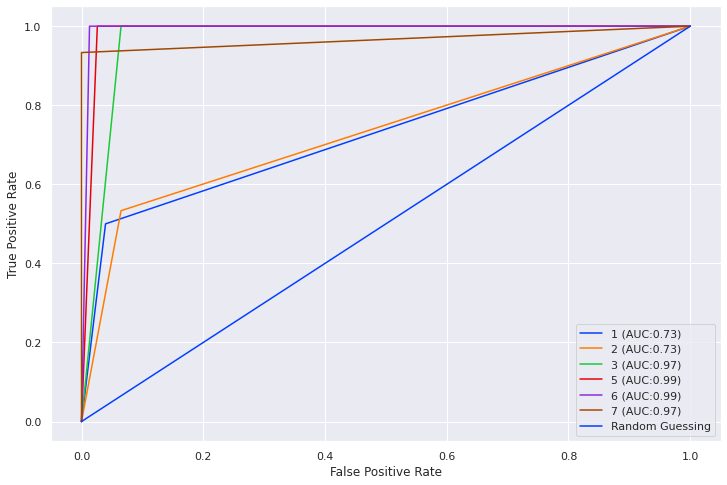

In [405]:
# ROC CURVE for Euclidean

target= ["1","2","3","5","6","7"]
sns.set( palette="bright")
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

print(f'\n\n ROC AUC score: {multiclass_roc_auc_score(Y_test, model_pred)} \n\n')

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

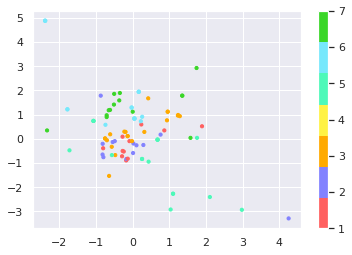

In [406]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=model_pred, s=10, cmap=cm_dark)
f.colorbar(points)
plt.show()

## **Prediction of Methods**

In [407]:
df1 = pd.DataFrame({'Actual': y_test, 'Manhattan': manhattan_predictions, 'Euclid': euclid_predictions })
df1.head()

,Actual,Manhattan,Euclid
197,7,7,7
37,1,1,1
89,2,2,2
176,6,6,1
170,5,5,5


In [408]:
df2 = pd.DataFrame({'actual': Y_test, 'Prediction': model_pred})
df2.head()

,actual,Prediction
302,5,5
355,6,6
16,1,1
83,2,1
106,2,2


## **Drawbacks of KNN:**

> The real drawback of kNN is its capacity to adapt to highly complex relationships between independent and dependent variables. kNN is less likely to perform well on advanced tasks like computer vision and natural language processing.